In [1]:
import sklearn
print(sklearn.__version__)


1.4.2


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [37]:
# List of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split


In [39]:
Images=[]
import os
for dirname,_,filenames in os.walk(data):
    for filename in filenames:
            file_name, file_extension = os.path.splitext(filename)
            if file_extension == '.db':
                continue
            img=os.path.join(dirname,filename)
            Images.append(img)

In [41]:
Images[:10]

['C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-001.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-002.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-003.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-004.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-005.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-006.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer Classification\\DATASET\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-007.png',
 'C:\\Users\\SONA\\Music\\ITDL04 -Breast Cancer 

In [43]:
len(Images)

1693

In [45]:
class_label=[]
for i in Images:
    j=i.split('\\')
    class_label.append(j[-2])

In [47]:
class_label[:10]

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign']

In [49]:
len(class_label)

1693

In [51]:
#shuffle two lists with same order
temp=list(zip(Images,class_label))
random.shuffle(temp)
Images,class_label=zip(*temp)
data=pd.DataFrame(list(zip(Images,class_label)),columns=['image_path','class_label'])

In [53]:
data.shape

(1693, 2)

In [55]:
data.head()

image_path class_label
0  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
1  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign
2  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
3  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
4  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant

In [57]:
data.class_label.value_counts()

class_label
malignant    1146
benign        547
Name: count, dtype: int64

In [59]:
from sklearn.utils import resample
df_c0 = data[data['class_label']== 'malignant']
df_c1 = data[data['class_label']== 'benign']


In [61]:
#downsample the majority class
upsampled_df_c0=resample(df_c0,replace=False,random_state=23,n_samples=1000)
upsampled_df_c1=resample(df_c1,replace=True,random_state=23,n_samples=1000)


In [63]:
#Cobine both
df_upsampled=pd.concat([upsampled_df_c0,upsampled_df_c1])

In [65]:
df_upsampled.head()

image_path class_label
1260  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
1361  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
490   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
234   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
780   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant

In [67]:
df_upsampled.class_label.value_counts()

class_label
malignant    1000
benign       1000
Name: count, dtype: int64

In [69]:
df_upsampled.shape

(2000, 2)

In [71]:
data = df_upsampled.sample(frac=1)
data.shape

(2000, 2)

In [73]:
data[:10]

image_path class_label
13    C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
912   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign
1267  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign
879   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign
180   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
1544  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
1364  C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign
491   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign
207   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...   malignant
861   C:\Users\SONA\Music\ITDL04 -Breast Cancer Clas...      benign

C:\Users\SONA\AppData\Local\Temp\ipykernel_6216\667570404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class_label", data=data, palette=sns.color_palette("cubehelix", 4))
C:\Users\SONA\AppData\Local\Temp\ipykernel_6216\667570404.py:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="class_label", data=data, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

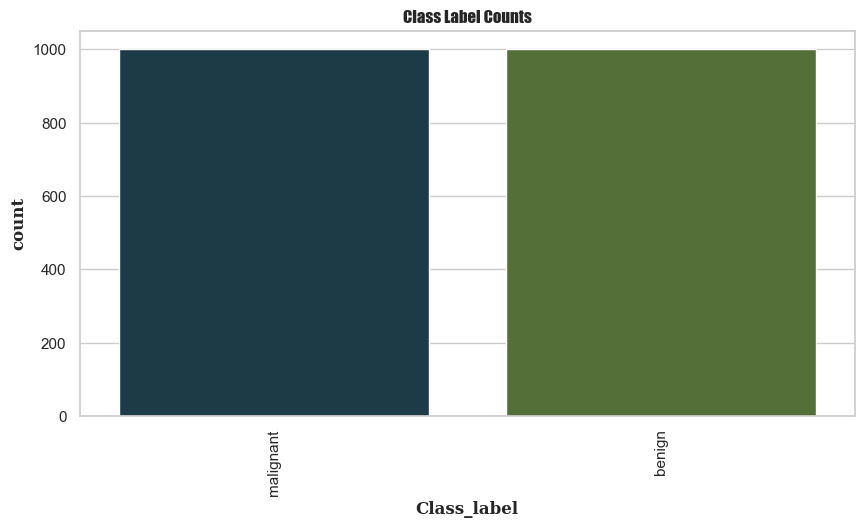

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [77]:
def resize_image(img_path):
    # Read the image
    file = cv2.imread(img_path) 
    # Resize the image
    resized = cv2.resize(file, (224, 224), interpolation=cv2.INTER_AREA)
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    resized = resized / 255
    resized= np.array(resized)
    # Reshape the resized image
    return resized

In [79]:
import cv2
images=[resize_image(img) for img in data['image_path']]

In [80]:
data['class_label'][:11]

13      malignant
912        benign
1267       benign
879        benign
180     malignant
1544    malignant
1364       benign
491        benign
207     malignant
861        benign
630     malignant
Name: class_label, dtype: object

In [81]:
class_names = list(data['class_label'])

In [85]:
images[0].shape

(224, 224, 3)

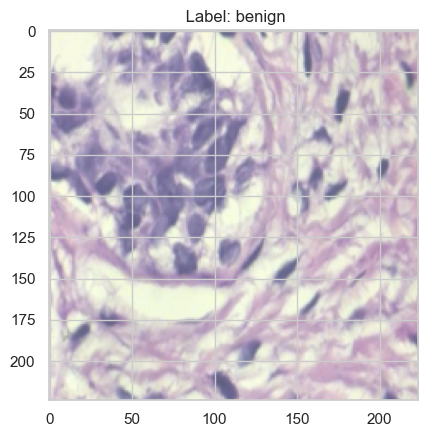

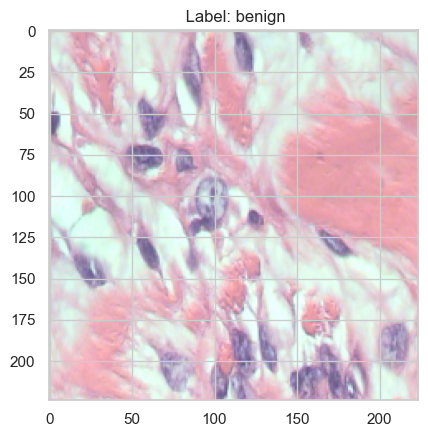

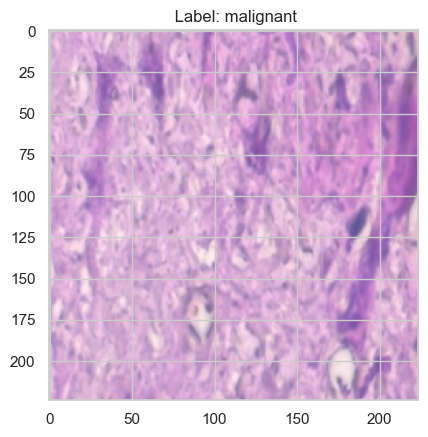

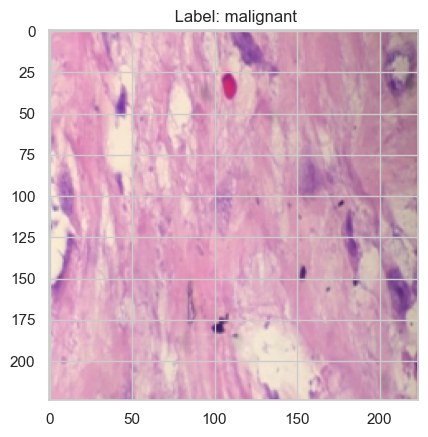

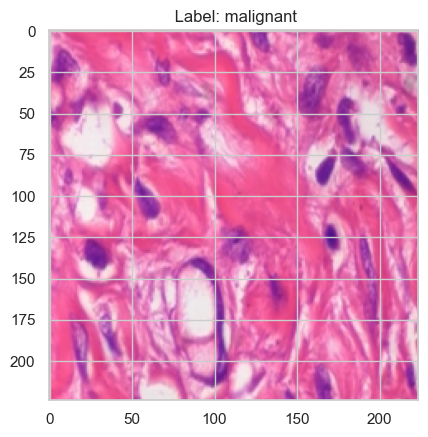

In [87]:
# Randomly choose 5 indices
random_indices = random.sample(range(len(images)), 5)

# Display 5 randomly chosen images with labels
for idx in random_indices:
    resized_img = images[idx]

    label = class_names[idx]  # Assuming label is stored in the 'label' column of your dataset
    plt.imshow(resized_img)
    plt.title(f" Label: {label}")
    #plt.axis('off')
    plt.show()

In [89]:
images = np.array(images)

In [91]:
images.shape

(2000, 224, 224, 3)

In [93]:
data['class_label']

13      malignant
912        benign
1267       benign
879        benign
180     malignant
          ...    
309     malignant
855     malignant
236        benign
469        benign
1042    malignant
Name: class_label, Length: 2000, dtype: object

In [95]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [97]:
enc.classes_

array(['benign', 'malignant'], dtype='<U9')

In [99]:
y[:10]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [101]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [103]:
y=np.array(y)

In [105]:
y.shape

(2000, 2)

In [107]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [109]:
images.shape

(2000, 224, 224, 3)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [113]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 224, 224, 3), (1400, 2), (600, 224, 224, 3), (600, 2))

In [115]:
## Manual CNN

In [121]:
batch_size = None

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                 activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()


C:\Users\SONA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 338,466 (1.29 MB)

 Trainable params: 338,466 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
#Compile the model
opt = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [125]:
history= model.fit(X_train, y_train, epochs =5, validation_data = (X_test,y_test),batch_size =16)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.5027 - loss: 0.7062 - val_accuracy: 0.5633 - val_loss: 0.6817
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.6338 - loss: 0.6721 - val_accuracy: 0.7050 - val_loss: 0.6086
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.7051 - loss: 0.6164 - val_accuracy: 0.6733 - val_loss: 0.6456
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.7008 - loss: 0.6055 - val_accuracy: 0.7550 - val_loss: 0.5781
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.7166 - loss: 0.6039 - val_accuracy: 0.7050 - val_loss: 0.5985


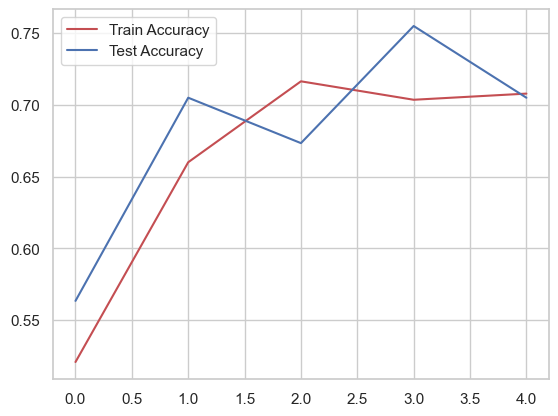

In [126]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

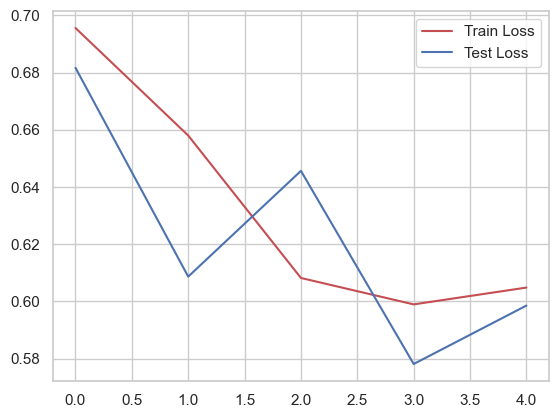

In [127]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [132]:
#print the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7049999833106995


19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


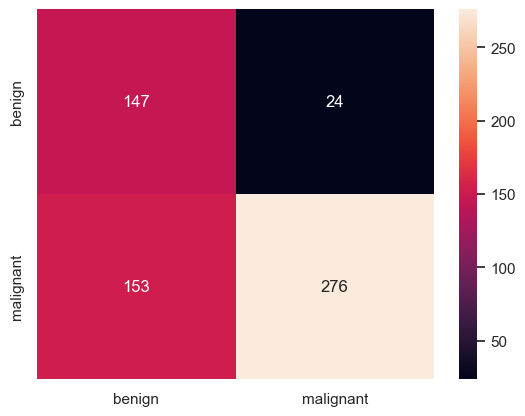

In [134]:
from sklearn.metrics import confusion_matrix
class_name = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(X_test), axis=1), np.argmax(y_test, axis=1)), columns = class_name, index=class_name)
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd')

In [136]:
score_1 = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy : ", score_1[1])

Test Accuracy :  0.7049999833106995


In [138]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[1]]
results.loc[0] = new

In [140]:
results

model  test_accuracy
0   CNN          0.705

In [142]:
from keras.applications.vgg16 import VGG16

In [144]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [146]:
vgg.trainable = False

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

# Load VGG16 without the top layers
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Build the model using the Functional API
input_tensor = Input(shape=(224, 224, 3))
x = vgg(input_tensor)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output_tensor = Dense(2, activation='softmax')(x)

model_1 = Model(inputs=input_tensor, outputs=output_tensor)

# Print the model summary
model_1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,942,850 (68.45 MB)

 Trainable params: 17,942,850 (68.45 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam, RMSprop

# Define optimizers
opt = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# Compile the model
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


In [13]:
opt = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model_1.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [17]:
from tensorflow.keras.datasets import cifar10

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


In [ ]:
import tensorflow as tf

def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img in images:
        img_resized = tf.image.resize(img, target_size)
        resized_images.append(img_resized)
    return tf.stack(resized_images)

# Resize your training and test images
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# Now fit the model
his2 = model_1.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test), batch_size=64)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with resizing
datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Define generators with target size
train_generator = datagen.flow_from_directory(
    'path_to_train_directory',  # Replace with your training data directory
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    'path_to_validation_directory',  # Replace with your validation data directory
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Fit the model using the generators
his2 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_and_resize(image_paths, target_size=(224, 224)):
    images = [img_to_array(load_img(img_path, target_size=target_size)) for img_path in image_paths]
    return np.array(images) / 255.0  # Normalize pixel values to [0, 1]

# Preprocess your images
X_train_resized = preprocess_and_resize(train_image_paths)
X_test_resized = preprocess_and_resize(test_image_paths)

# Fit the model with the resized images
his2 = model_1.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test), batch_size=64)


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

# Load VGG16 without the top layers
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Build the model using the Functional API
input_tensor = Input(shape=(224, 224, 3))
x = vgg(input_tensor)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output_tensor = Dense(2, activation='softmax')(x)

model_1 = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model_1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,942,850 (68.45 MB)

 Trainable params: 17,942,850 (68.45 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.datasets import cifar10

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
import tensorflow as tf

def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img in images:
        img_resized = tf.image.resize(img, target_size)
        resized_images.append(img_resized)
    return tf.stack(resized_images)

# Resize your training and test images
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# Fit the model with resized images
his2 = model_1.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test), batch_size=64)


In [10]:
import tensorflow as tf

def resize_images(images, target_size=(224, 224)):
    resized_images = tf.image.resize(images, target_size)
    return resized_images

# Resize training and test images
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# Fit the model with resized images
his2 = model_1.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test), batch_size=64)


NameError: name 'X_train' is not defined

In [8]:
print(X_train_resized.shape)  # Should be (num_samples, 224, 224, 3)
print(X_test_resized.shape)   # Should be (num_samples, 224, 224, 3)


NameError: name 'X_train_resized' is not defined

In [5]:
score_4 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_4[1])

NameError: name 'model_1' is not defined

In [1]:
his2= model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size =64)
# his2 = model_1.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=10, validation_data=(X_test, y_test))

NameError: name 'model_1' is not defined

In [3]:
# plot the accuracy plot
plt.plot(his2.history['accuracy'], 'r')
plt.plot(his2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

NameError: name 'plt' is not defined

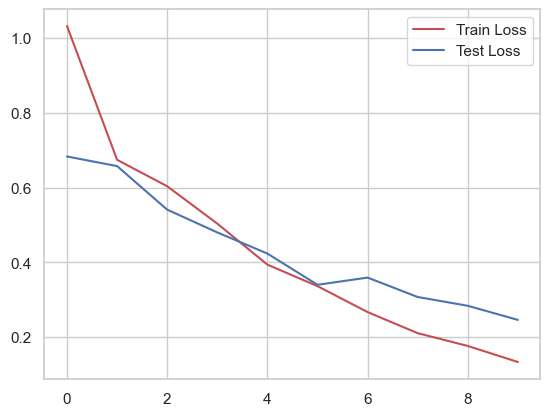

In [71]:
# plot the accuracy plot
plt.plot(his2.history['loss'], 'r')
plt.plot(his2.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [72]:
model_1.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\VGG16_model_90.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 223ms/step


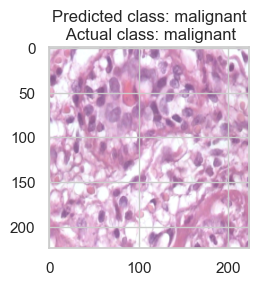

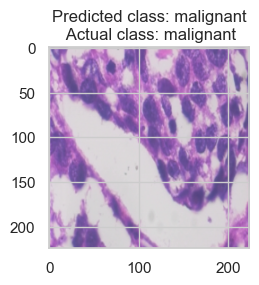

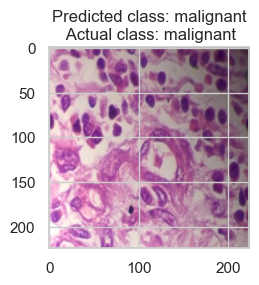

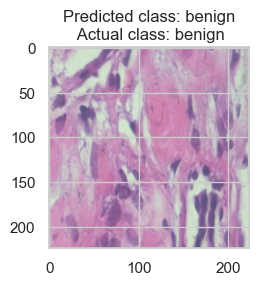

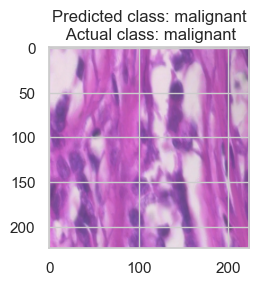

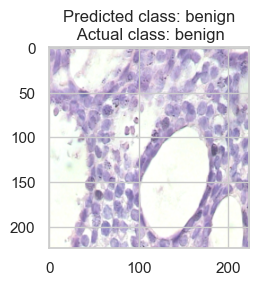

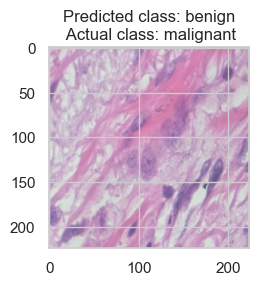

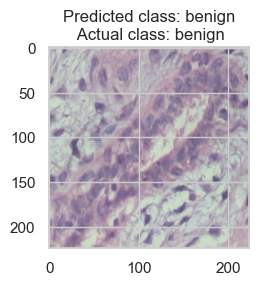

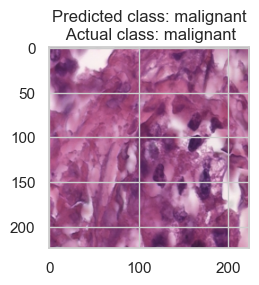

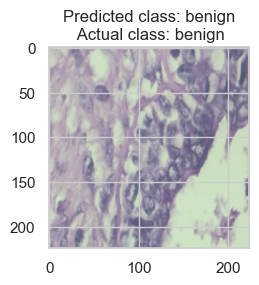

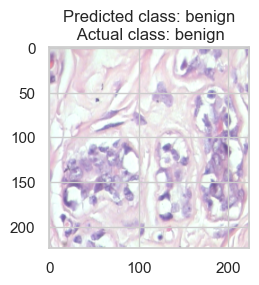

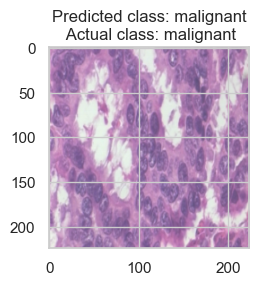

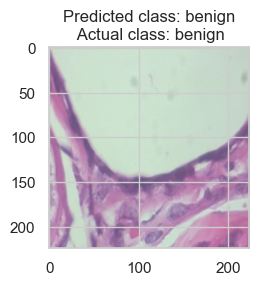

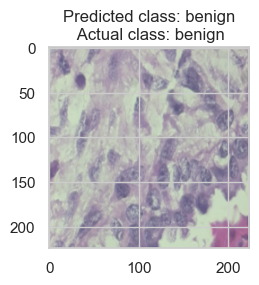

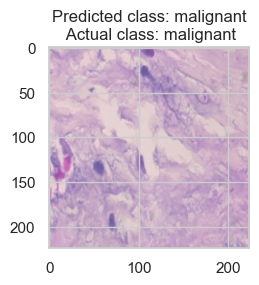

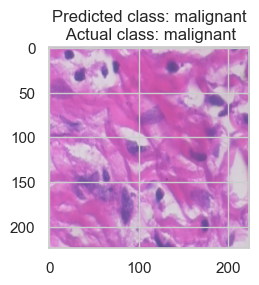

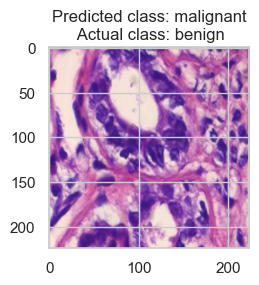

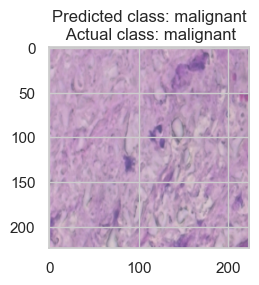

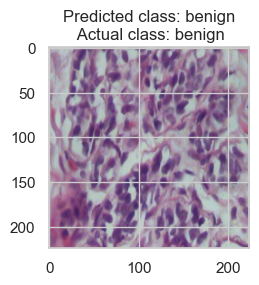

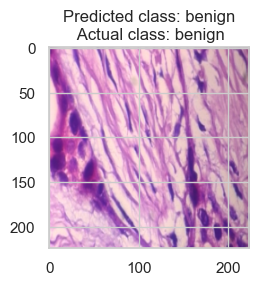

In [73]:
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_1.predict(np.array([X_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.imshow(X_test[i])

In [67]:
# results = pd.DataFrame(columns=['model', 'test_accuracy'])
# new = ['CNN', score_1[0]]
# results.loc[0] = new

In [74]:
new = ['VGG', score_4[1]]
results.loc[1] = new

In [75]:
# results = pd.DataFrame(columns=['model', 'test_accuracy'])
# new = ['CNN', score_1[1]]
# results.loc[1] = new

In [76]:
results

model  test_accuracy
0   CNN       0.585000
1   VGG       0.906667

In [77]:
# import the vgg19 model
from keras.applications.vgg19 import VGG19

In [78]:
vgg1=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [79]:
vgg1.trainable=False

In [81]:
# Set the vgg16 model
model_2=Sequential()
model_2.add(vgg1)
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 23236034 (88.64 MB)
Trainable params: 3211650 (12.25 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [82]:
#Compile the model
model_2.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [83]:
#Fit the data or train the model
History_2 = model_2.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size = 20)

Epoch 1/5
70/70 [==============================] - 374s 5s/step - loss: 0.7126 - accuracy: 0.6443 - val_loss: 0.5213 - val_accuracy: 0.7617
Epoch 2/5
70/70 [==============================] - 265s 4s/step - loss: 0.4616 - accuracy: 0.8221 - val_loss: 0.4125 - val_accuracy: 0.8433
Epoch 3/5
70/70 [==============================] - 288s 4s/step - loss: 0.3590 - accuracy: 0.8586 - val_loss: 0.4650 - val_accuracy: 0.8017
Epoch 4/5
70/70 [==============================] - 253s 4s/step - loss: 0.3144 - accuracy: 0.8750 - val_loss: 0.3537 - val_accuracy: 0.8767
Epoch 5/5
70/70 [==============================] - 249s 4s/step - loss: 0.2222 - accuracy: 0.9286 - val_loss: 0.3667 - val_accuracy: 0.8350


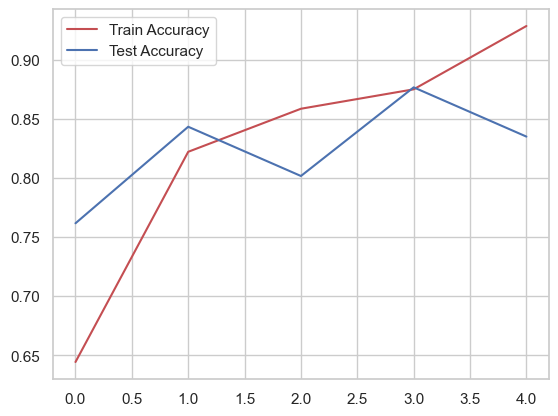

In [84]:
# plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [85]:
# score_5 = model_2.evaluate(X_train, y_train, verbose=0)
# print('train accuracy:', score_5[1])

In [86]:
score_6 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_6[1])

Test accuracy: 0.8349999785423279


19/19 [==============================] - 72s 4s/step


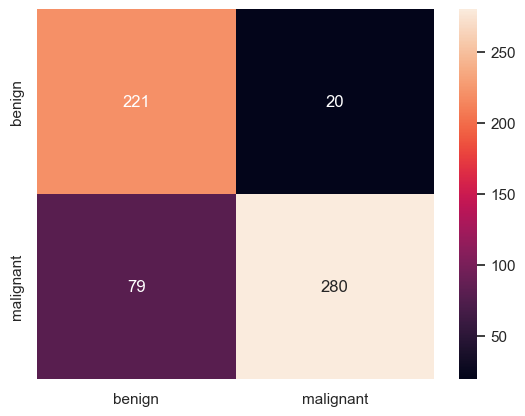

In [87]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_2.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [88]:
new = ['VGG19', score_6[1]]
results.loc[2] = new

In [89]:
results

model  test_accuracy
0    CNN       0.585000
1    VGG       0.906667
2  VGG19       0.835000

In [83]:
#model.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\CNN_model.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
model_2.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\VGG19_model_.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
from tensorflow.keras.applications import MobileNet

In [92]:
mob = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [93]:
mob.trainable=False

In [94]:
# Set the mobilenet model

model_mob=Sequential()
model_mob.add(mob)
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(64, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(2, activation='softmax'))

In [95]:
#Compile the model
opt = Adam(learning_rate=0.001)

optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_mob.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [96]:
from keras.callbacks import ModelCheckpoint
filepath=r"C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\mob-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [97]:
#Fit the data or train the model
History_3 = model_mob.fit(X_train, y_train, epochs =10, validation_data = (X_test,y_test),batch_size = 64,callbacks=callbacks_list)

Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 4.7037 - accuracy: 0.6086
Epoch 1: val_accuracy improved from -inf to 0.74833, saving model to C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\mob-01-0.75.hdf5
22/22 [==============================] - 124s 4s/step - loss: 4.7037 - accuracy: 0.6086 - val_loss: 0.5258 - val_accuracy: 0.7483
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 0.5958 - accuracy: 0.7650
Epoch 2: val_accuracy did not improve from 0.74833
22/22 [==============================] - 28s 1s/step - loss: 0.5958 - accuracy: 0.7650 - val_loss: 0.5561 - val_accuracy: 0.7300
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 0.8208 - accuracy: 0.7386
Epoch 3: val_accuracy did not improve from 0.74833
22/22 [==============================] - 27s 1s/step - loss: 0.8208 - accuracy: 0.7386 - val_loss: 1.3313 - val_accuracy: 0.6517
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.8564
Epo

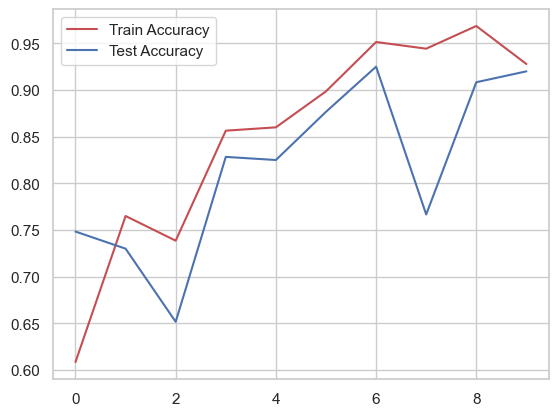

In [98]:
# plot the accuracy plot
plt.plot(History_3.history['accuracy'], 'r')
plt.plot(History_3.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [99]:
score_7 = model_mob.evaluate(X_test,y_test, verbose=0)
print('Test accuracy:', score_7[1])

Test accuracy: 0.9200000166893005


In [100]:
new = ['MobileNet', score_7[1]]
results.loc[3] = new

In [101]:
results

model  test_accuracy
0        CNN       0.585000
1        VGG       0.906667
2      VGG19       0.835000
3  MobileNet       0.920000

19/19 [==============================] - 9s 421ms/step


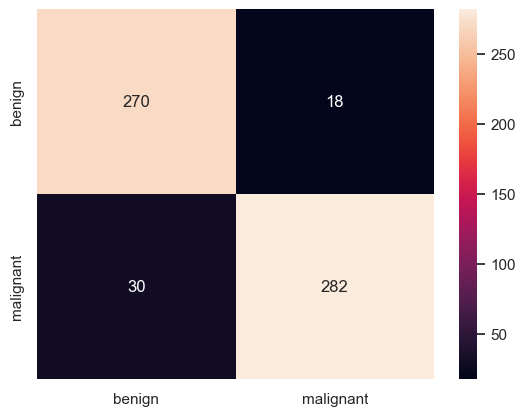

In [102]:
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_mob.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [103]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [107]:
inception =InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [108]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False
     

In [109]:

print("Building model with InceptionV3 with imagenet weights")
model_5 = Sequential([
    inception,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.2),
    Dense(2, activation='softmax')
])


model_5.summary()

Building model with InceptionV3 with imagenet weights
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_6 (Flatten)         (None, 51200)             0         
                                                                 
 dense_17 (Dense)            (None, 512)               26214912  
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 48018722 (183.18 MB)
Trainable params: 26215938 (100.01 MB)
Non-trainable params: 21802784 (83.17 MB)
________________

In [110]:
# tell the model what cost and optimization method to use
model_5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
# # Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [112]:
his5 = model_5.fit(X_train, y_train, epochs =5, validation_data = (X_test,y_test),batch_size = 64)

Epoch 1/5
22/22 [==============================] - 208s 7s/step - loss: 16.1068 - accuracy: 0.5800 - val_loss: 2.2420 - val_accuracy: 0.7250
Epoch 2/5
22/22 [==============================] - 49s 2s/step - loss: 1.2791 - accuracy: 0.7807 - val_loss: 0.6151 - val_accuracy: 0.7483
Epoch 3/5
22/22 [==============================] - 49s 2s/step - loss: 0.3264 - accuracy: 0.8571 - val_loss: 0.3800 - val_accuracy: 0.8350
Epoch 4/5
22/22 [==============================] - 49s 2s/step - loss: 0.1968 - accuracy: 0.9236 - val_loss: 0.3297 - val_accuracy: 0.8817
Epoch 5/5
22/22 [==============================] - 48s 2s/step - loss: 0.1417 - accuracy: 0.9557 - val_loss: 0.3066 - val_accuracy: 0.8733


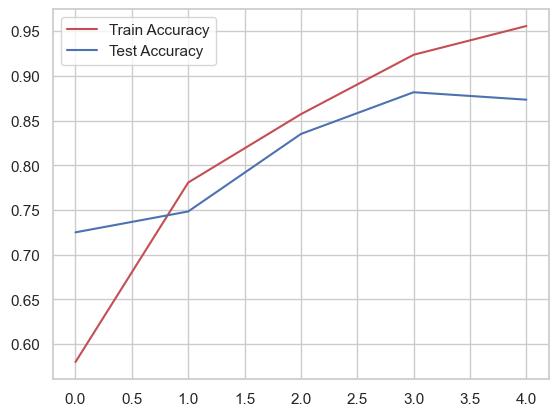

In [115]:
# plot the accuracy plot
plt.plot(his5.history['accuracy'], 'r')
plt.plot(his5.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

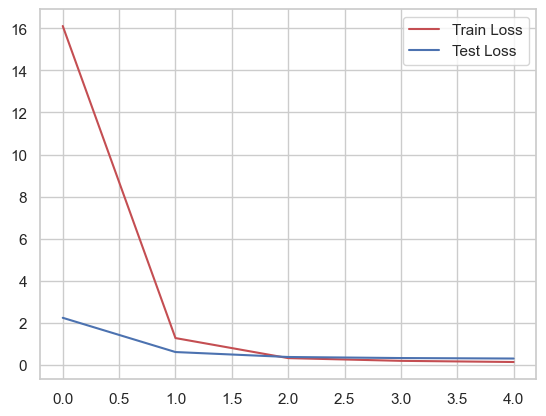

In [116]:
# plot the accuracy plot
plt.plot(his5.history['loss'], 'r')
plt.plot(his5.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [117]:
score_8 = model_5.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_8[1])

Test accuracy: 0.8733333349227905


19/19 [==============================] - 26s 772ms/step


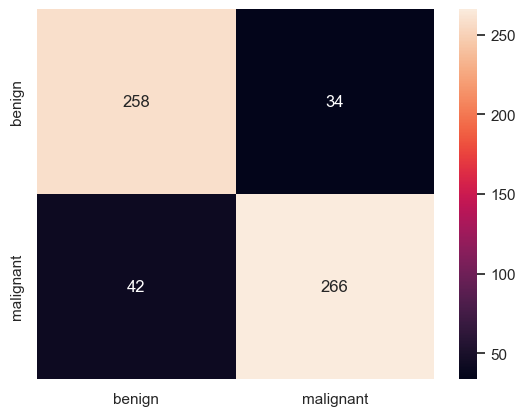

In [118]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_5.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [119]:
model_5.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\inception_model.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [120]:
new = ['inception', score_8[1]]
results.loc[4] = new

In [121]:
results

model  test_accuracy
0        CNN       0.585000
1        VGG       0.906667
2      VGG19       0.835000
3  MobileNet       0.920000
4  inception       0.873333